In [1]:
import csv
live_id = []  
author = [] 
seg_id = []
start_timestamp = []
start = [] 
end = [] 
emb = []
with open('data.csv','r') as f:
    reader = csv.reader((line.replace('\0','') for line in f), delimiter = ",")
    i = 0
    for row in reader:
        if i == 80000:
            break
        i += 1
        live_id.append(row[0])
        if row[1] != '':
            author.append(row[1])
        else:
            author.append('0')
            
        if row[2] != '':
            start_timestamp.append(row[2])
        else:
            start_timestamp.append('0')
            
        seg_id.append(row[3])
        start.append(row[4])
        end.append(row[5])
        emb.append(row[6:]) 

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
import matplotlib.pyplot as plt
k_means = KMeans(n_clusters=500, random_state=10)
k_means.fit(emb)
labels = k_means.predict(emb)

/root/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from collections import defaultdict
dic = defaultdict(list)
for i in range(len(labels)):
    dic[labels[i]].append(i)
#格式： {0:64维向量， 1:64维向量。。。} 0 表示聚类标签为0，64维向量是聚类标签为0的数据的emb的均值。
core = {}
lisan = dic[-1]
for i in dic:
    if dic[i] != [] and i != -1:
        temp = [0]*64
        if dic[i] != -1:
            for j in range(len(dic[i])):
                temp = [(temp[k] + float(emb[dic[i][j]][k])) for k in range(64)]
            temp = [j / len(dic[i]) for j in temp]
            core[i] = temp
#最大最小距离

In [6]:
# 一个类平均有几个id
ans = 0
for key in dic:
    sets = set()
    for i in range(len(dic[key])):
        sets.add(author[dic[key][i]])
    ans += len(sets)
ans /= len(dic)
ans

8.19560878243513

In [7]:
# 一个id平均被分到几个类
ans = 0
dic_author = defaultdict(list)
for i in range(len(author)):
    if author != '0':
        dic_author[author[i]].append(i) 

for key in dic_author:
    sets = set()
    for i in range(len(dic_author[key])):
        sets.add(labels[dic_author[key][i]])
    ans += len(sets)
ans /= len(dic_author)
ans

1.6101960784313725

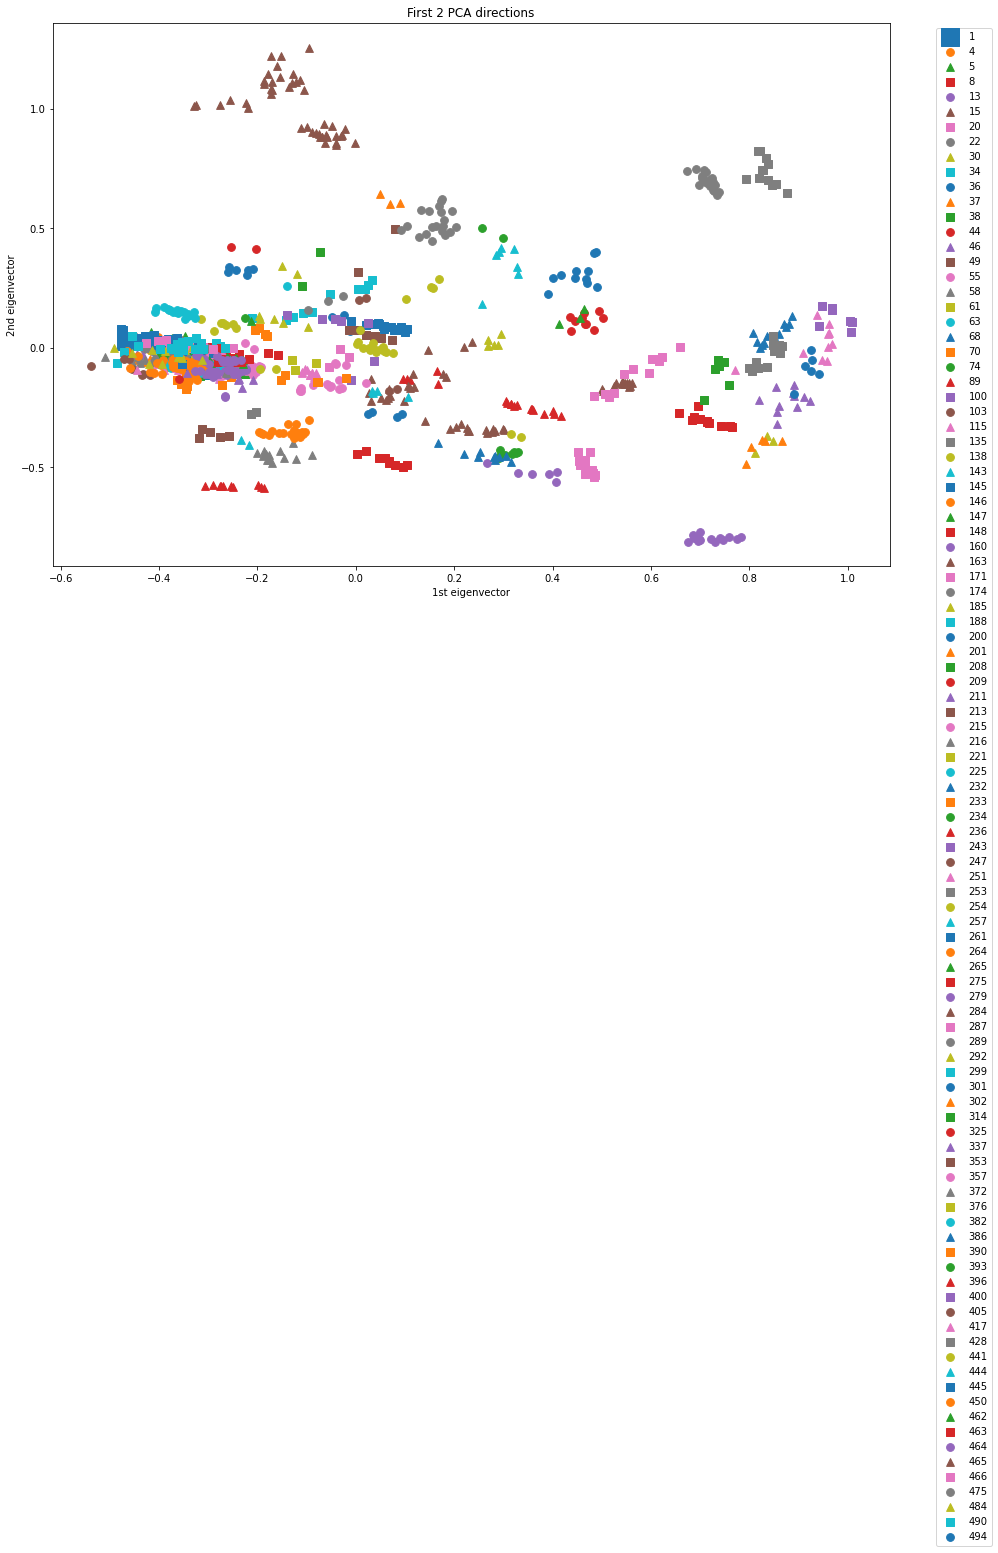

In [9]:
# 二维可视化
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# 选择3000个点可视化
X_small = [] 
y_small = []
for i in range(1000):
    X_small.append(emb[i])
    y_small.append(labels[i])

# PCA降到三维
pca_3 = PCA(n_components=3)
X_PCA_3 = pca_3.fit_transform(X_small)

# 二维作图
plt.figure(figsize=(15,10))
style = y_small
markers = ["s","o", "^"]
for i, c in enumerate(np.unique(y_small)):
    s = 60 if i != 0 else 300
    plt.scatter(X_PCA_3[:, 0][y_small==c], X_PCA_3[:, 1][y_small==c],
                marker=markers[i%3], s=s, label=int(c))
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("First 2 PCA directions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [10]:
count_labels = defaultdict(int)
for i in range(len(labels)):
    count_labels[labels[i]] += 1

In [12]:
sorted(count_labels.items(),key=lambda x:x[0])

[(0, 62),
 (1, 1137),
 (2, 39),
 (3, 1201),
 (4, 859),
 (5, 682),
 (6, 96),
 (7, 385),
 (8, 1441),
 (9, 151),
 (10, 176),
 (11, 841),
 (12, 47),
 (13, 106),
 (14, 88),
 (15, 224),
 (16, 115),
 (17, 120),
 (18, 115),
 (19, 125),
 (20, 186),
 (21, 84),
 (22, 1711),
 (23, 104),
 (24, 73),
 (25, 95),
 (26, 48),
 (27, 107),
 (28, 111),
 (29, 133),
 (30, 182),
 (31, 49),
 (32, 169),
 (33, 35),
 (34, 1038),
 (35, 150),
 (36, 96),
 (37, 757),
 (38, 1107),
 (39, 103),
 (40, 123),
 (41, 126),
 (42, 122),
 (43, 88),
 (44, 167),
 (45, 90),
 (46, 1457),
 (47, 187),
 (48, 113),
 (49, 52),
 (50, 69),
 (51, 71),
 (52, 217),
 (53, 173),
 (54, 180),
 (55, 1120),
 (56, 59),
 (57, 119),
 (58, 1063),
 (59, 78),
 (60, 99),
 (61, 1073),
 (62, 79),
 (63, 293),
 (64, 47),
 (65, 110),
 (66, 135),
 (67, 177),
 (68, 110),
 (69, 105),
 (70, 188),
 (71, 89),
 (72, 116),
 (73, 82),
 (74, 97),
 (75, 55),
 (76, 173),
 (77, 79),
 (78, 88),
 (79, 64),
 (80, 76),
 (81, 55),
 (82, 66),
 (83, 66),
 (84, 64),
 (85, 81),
 (8

In [13]:
def cal_cos(A,B):
    vector1 = np.array(A)
    vector2 = np.array(B)
    op = np.dot(vector1,vector2)/(np.linalg.norm(vector1)*(np.linalg.norm(vector2)))
    return abs(op)
        
# 类内方差最大和最小的簇
mins_nei = float('INF')
maxs_nei = -float('INF')
minnei_labels = 0
maxnei_labels = 0
for key in core:
    sums = 0
    for i in range(len(dic[key])):
        embedding = [float(i) for i in emb[dic[key][i]]]
        sums += cal_cos(core[key],embedding)
    sums /= len(dic[key])
    if sums < mins_nei:
        mins_nei = sums
        minnei_labels = key
    if sums > maxs_nei:
        maxs_nei = sums
        maxnei_labels = key

# 类间距离最大和最小的簇
mins = float('INF')
maxs = -float('INF')
min_labels = (0,0)
max_labels = (0,0)
key_list = list(core.keys())

for i in range(len(key_list)):
    for j in range(i+1, len(key_list)):
        distance = cal_cos(core[key_list[i]],core[key_list[j]])
        if distance < mins:
            mins = distance
            min_labels = (key_list[i],key_list[j])
        if distance > maxs:
            maxs = distance
            max_labels = (key_list[i],key_list[j])   

In [14]:
print('类内方差最大的簇为{}'.format(minnei_labels))
print('类内方差最大的簇与簇中心点的平均余弦距离为{}'.format(mins_nei))
print('类内方差最小的簇为{}'.format(maxnei_labels))
print('类内方差最小的簇与簇中心点的平均余弦距离为{}'.format(maxs_nei))
print('类间距离最大的簇为{}'.format(min_labels))
print('类间距离最大两个簇之间的余弦距离为{}'.format(mins))
print('类间距离最小的簇为{}'.format(max_labels))
print('类间距离最小两个簇之间的余弦距离为{}'.format(maxs))

类内方差最大的簇为379
类内方差最大的簇与簇中心点的平均余弦距离为0.545089639140386
类内方差最小的簇为269
类内方差最小的簇与簇中心点的平均余弦距离为0.99650747214883
类间距离最大的簇为(53, 117)
类间距离最大两个簇之间的余弦距离为3.4038825512052497e-06
类间距离最小的簇为(484, 445)
类间距离最小两个簇之间的余弦距离为0.963648484384776


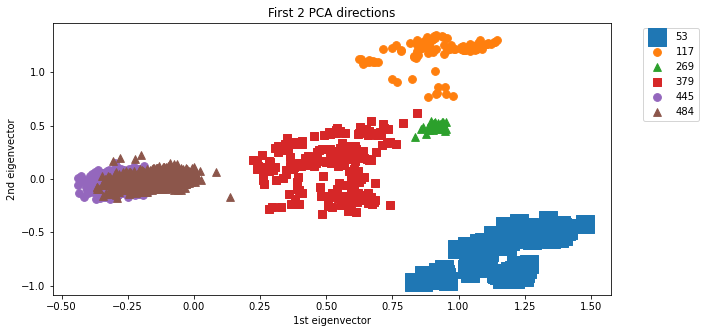

In [15]:
X_small = [] 
y_small = []
for i in range(len(emb)):
    if labels[i] in [minnei_labels, maxnei_labels,min_labels[0], min_labels[1], max_labels[0], max_labels[1] ]:
        X_small.append(emb[i])
        y_small.append(labels[i])

# PCA降到三维
pca_3 = PCA(n_components=3)
X_PCA_3 = pca_3.fit_transform(X_small)

# 二维作图
plt.figure(figsize=(10,5))
style = y_small
markers = ["s","o", "^"]
for i, c in enumerate(np.unique(y_small)):
    s = 60 if i != 0 else 300
    plt.scatter(X_PCA_3[:, 0][y_small==c], X_PCA_3[:, 1][y_small==c],
                marker=markers[i%3], s=s, label=int(c))
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("First 2 PCA directions")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [16]:
# 输出数据
# 类内方差最大.csv, 类内方差最小.csv, 大类.csv(30%的数据被归为1类)
def save(filename,name):
    header = ['random_live.live_id',' author_table.author','live_start_timestamp_s','seg_id','starttime_ms','endtime_ms']
    rows = zip(
        [live_id[i] for i in dic[name]],
        [author[i] for i in dic[name]],
        [start_timestamp[i] for i in dic[name]],
        [seg_id[i] for i in dic[name]],
        [start[i] for i in dic[name]],
        [end[i] for i in dic[name]]
    )
    with open(filename, 'w', newline='') as fp:
        writer = csv.writer(fp)
        writer.writerow(header)
        for row in rows:
            writer.writerow(row)

In [17]:
save('类内方差最大_kmeans.csv',minnei_labels)
save('类内方差最小_kmeans.csv',maxnei_labels)

In [18]:
# 类间距离最大.csv, 类间距离最小.csv
def save1(filename,name1,name2):
    header = ['random_live.live_id_1',' author_table.author_1','live_start_timestamp_s_1','seg_id_1','starttime_ms_1','endtime_ms_1','random_live.live_id_2',' author_table.author_2','live_start_timestamp_s_2','seg_id_2','starttime_ms_2','endtime_ms_2']
    rows = zip(
        [live_id[i] for i in dic[name1]],
        [author[i] for i in dic[name1]],
        [start_timestamp[i] for i in dic[name1]],
        [seg_id[i] for i in dic[name1]],
        [start[i] for i in dic[name1]],
        [end[i] for i in dic[name1]],
        [live_id[i] for i in dic[name2]],
        [author[i] for i in dic[name2]],
        [start_timestamp[i] for i in dic[name2]],
        [seg_id[i] for i in dic[name2]],
        [start[i] for i in dic[name2]],
        [end[i] for i in dic[name2]]
    )
    with open(filename, 'w', newline='') as fp:
        writer = csv.writer(fp)
        writer.writerow(header)
        for row in rows:
            writer.writerow(row) 

In [20]:
save1('类间距最大_kmeans.csv',min_labels[0],min_labels[1])
save1('类间距最小_kmeans.csv',max_labels[0],max_labels[1])

In [22]:
save('大类_kmeans.csv',22)